+------------+-------------+-----------------+
| Generation | Max Fitness | Average Fitness |
+------------+-------------+-----------------+
|     0      |      64     |        49       |
|     1      |      63     |        51       |
|     2      |      66     |        53       |
|     3      |      67     |        55       |
|     4      |      69     |        57       |
|     5      |      69     |        59       |
|     6      |      70     |        60       |
|     7      |      72     |        62       |
|     8      |      73     |        64       |
|     9      |      76     |        65       |
|     10     |      76     |        66       |
|     11     |      78     |        68       |
|     12     |      80     |        69       |
|     13     |      81     |        70       |
|     14     |      80     |        72       |
|     15     |      82     |        73       |
|     16     |      83     |        74       |
|     17     |      84     |        75       |
|     18     

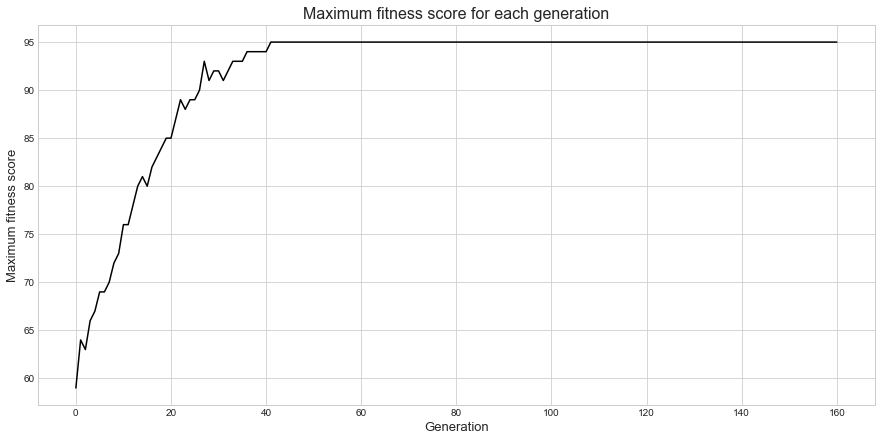

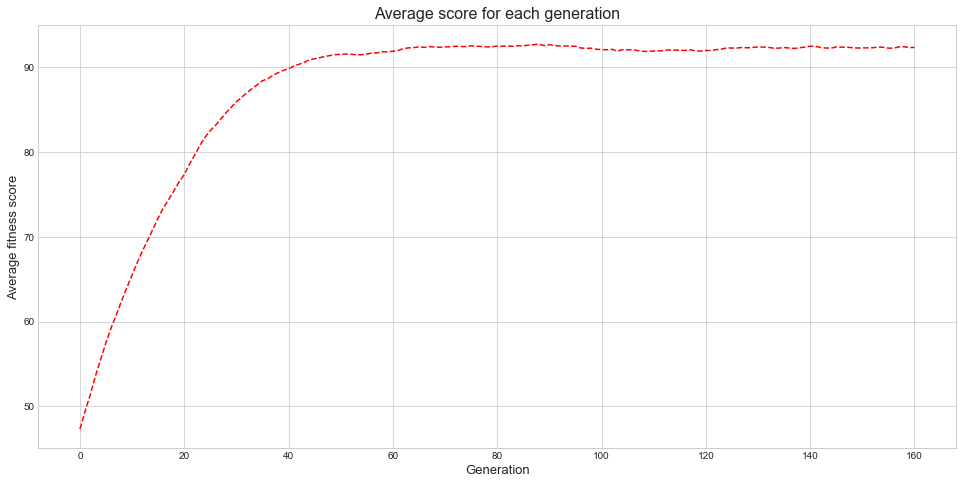

In [60]:
import random
import numpy as np
from prettytable import PrettyTable
import myfunctions


    

# Set  parameters to be used::#chromosome length= rows, population_size=column when the array is generated by nupy array
chromosome_length = 95
population_size = 500
maximum_generation = 160
best_score_progress = [] # Tracks progress
average_generation_score_progress = [] # Tracks average progress

# Create reference solution 
# (this is used just to illustrate GAs)
reference = create_reference_solution(chromosome_length)

# Create starting population
population = create_starting_population(population_size, chromosome_length)

# Display best score in starting population ::: best_score = np.max(scores)/chromosome_length * 100
scores = calculate_fitness(reference, population)
my_starting_best_score = best_score = np.max(scores)
my_starting_average_score = average_fitness_score  = calculate_average_fitness_score(scores,population_size)

##print ('\t Starting best score, percent target: ' + str(int(best_score)))

#:::Start my table Table
#print("Generation | Max Fitness | Average Fitness \n-------------------------------------------")
xTable = PrettyTable()
xTable.field_names = ["Generation", "Max Fitness", "Average Fitness"]


# Add starting best score to progress tracker
best_score_progress.append(best_score)
average_generation_score_progress.append(average_fitness_score)

# Now we'll go through the generations of genetic algorithm
for generation in range(maximum_generation):
    # Create an empty list for new population
    new_population = []
    
    # Create new popualtion generating two children at a time
    for i in range(int(population_size/2)):
        parent_1 = individual_selection(population, scores)
        parent_2 = individual_selection(population, scores)
        child_1, child_2 = breed_by_crossover(parent_1, parent_2)
        new_population.append(child_1)
        new_population.append(child_2)
    
    # Replace the old population with the new one
    population = np.array(new_population)
    
    # Apply mutation
    mutation_rate = 0.009
    population = randomly_mutate_population(population, mutation_rate)

    # Score best solution, and add to tracker 
    scores = calculate_fitness(reference, population)
    best_score = np.max(scores)
    best_score_progress.append(best_score)
    
    #average fitnes for each genaration == total scores of the generation divided by population size
    average_fitness_score  = calculate_average_fitness_score(scores,population_size)
    average_generation_score_progress.append(average_fitness_score)

    
    xTable.add_row([generation, int(best_score), int(average_fitness_score)])
print(xTable)
#:::::::::::::::::::::: GA has completed required generation

print("\n")
print("Summary:")
print ('\t Start maximum fitness prediction score before iteration: ' + str(int(my_starting_best_score)))
print ('\t End maximum fitness prediction score after iteration: ' + str(int(best_score)))

print("\n")
print ('\t Start average fitness prediction score before iteration: ' + str(int(my_starting_average_score)))
print ('\t End average fitness prediction score after iteration: ' + str(int(average_fitness_score)))



print("\n")
print("Graphical Representation \n")


import matplotlib.pyplot as plt
%matplotlib inline

#plt.subplot(211)
plt.subplots(1,figsize=(15,7))
plt.title('Maximum fitness score for each generation', fontsize=16)
plt.style.use('seaborn-whitegrid')
plt.plot(best_score_progress,"k")
plt.xlabel('Generation', fontsize=13)
plt.ylabel('Maximum fitness score', fontsize=13)


plt.subplots(1,figsize=(15,7))
plt.title('Average score for each generation', fontsize=16)
plt.style.use('seaborn-whitegrid')
plt.plot(average_generation_score_progress,"r--")
plt.xlabel('Generation', fontsize=13)
plt.ylabel('Average fitness score', fontsize=13)

plt.subplots_adjust(top=0.92, bottom=0.08, left= 0.10, right=0.95, hspace=0.85, wspace=0.35)

plt.show()

